### https://facebook.github.io/prophet/docs/quick_start.html#python-api

In [1]:
import numpy as np
import pandas as pd
from fbprophet import Prophet

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

pd.plotting.register_matplotlib_converters()

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv('sales.csv')

# df = pd.read_csv('wine.csv')
# df.sales = df.sales * 1000
# df.rename({'month': 'ds', 'sales': 'y'}, axis=1, inplace=True)

# df = pd.read_csv('test.csv')

# df = pd.read_csv('AirPassengers.csv')
# df.rename({'Month': 'ds', '#Passengers': 'y'}, axis=1, inplace=True)

# df = pd.read_csv('prophet.csv')

dates = df['ds'].apply(lambda x: pd.datetime.strptime(x, '%Y-%m-%d'))
# dates = df['ds'].apply(lambda x: pd.datetime.strptime(x, '%Y-%m'))

df.head()

,ds,y
0,2009-10-01,338630
1,2009-11-01,339386
2,2009-12-01,400264
3,2010-01-01,314640
4,2010-02-01,311022


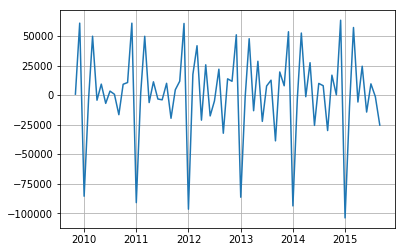

In [3]:
plt.plot(dates, df['y'] - df['y'].shift())
plt.grid()

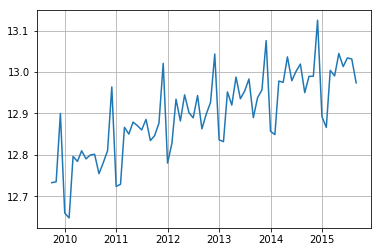

In [4]:
ts_log = np.log (df['y']) 
plt.plot (dates, ts_log)
plt.grid()

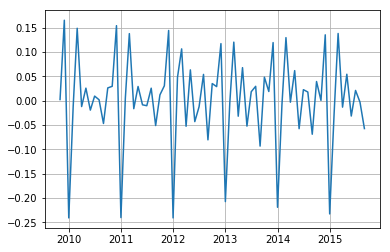

In [5]:
ts_log_diff = ts_log - ts_log.shift () 
plt.plot (dates, ts_log_diff)
plt.grid()

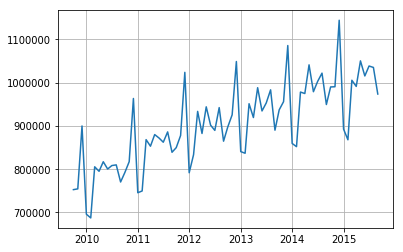

In [6]:
from scipy.stats import boxcox

new_y, _ = boxcox(df['y'])
plt.plot(dates, new_y)
plt.grid()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


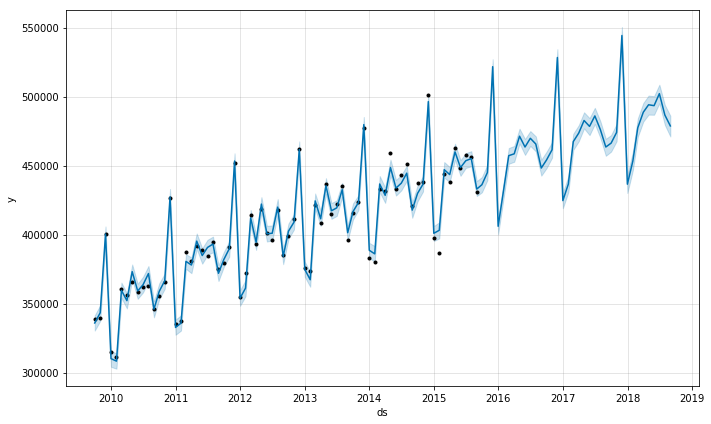

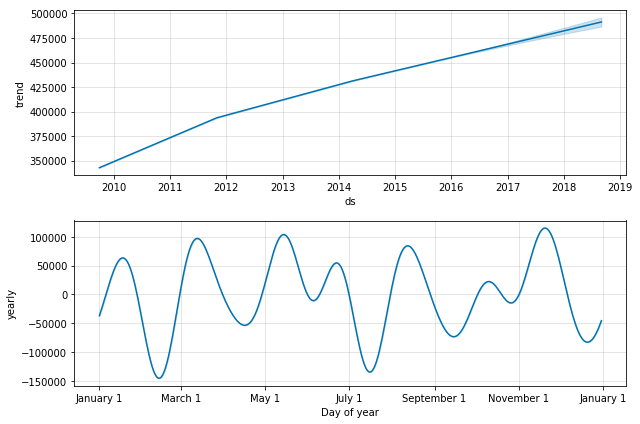

In [7]:
m = Prophet()
m.fit(df)

future = m.make_future_dataframe(periods=36, freq='M')
forecast = m.predict(future)
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)


Populating the interactive namespace from numpy and matplotlib


/home/kupuk/Projects/Time_Series_Forecasting/venv/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/kupuk/Projects/Time_Series_Forecasting/venv/lib/python3.5/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


<Figure size 1080x504 with 0 Axes>

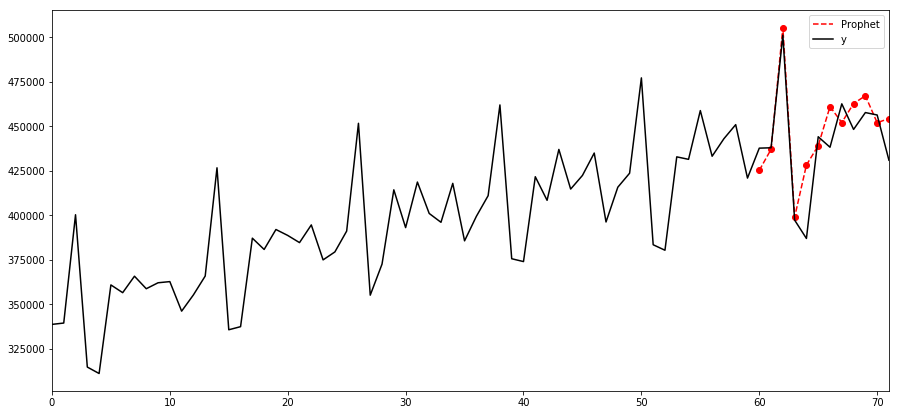

In [8]:
%pylab inline
plt.figure(figsize(15,7))
pylab.show()

df_train = df[:-12]
df_test = df[-12:]

m = Prophet()
m.fit(df_train)

future = m.make_future_dataframe(periods=12, freq='M')
forecast = m.predict(future)
# fig1 = m.plot(forecast)

df_r = forecast[-12:]
df_r.rename({'yhat': 'Prophet'}, axis=1, inplace=True)
df_r.Prophet.plot(style='--', marker='o', color='red', legend=True)
df.y.plot(color='black', legend=True)
# df_r.SARIMAX.plot(style='--', marker='o', color='red', legend=True)


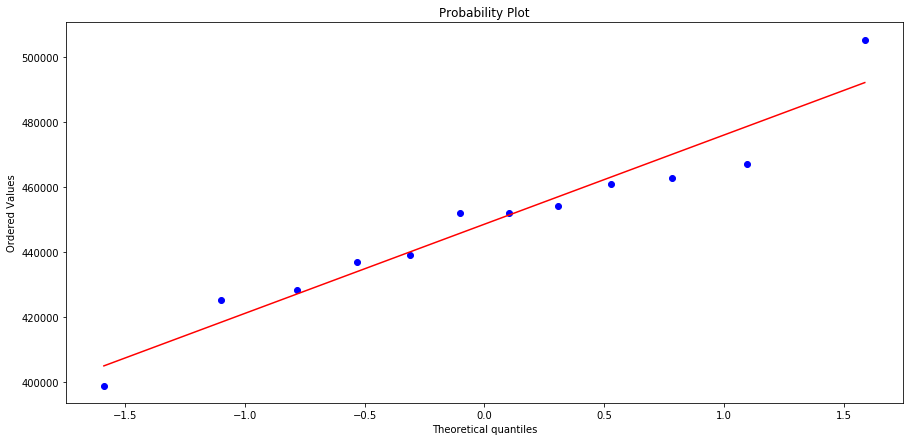

In [9]:
import scipy.stats as stats

measurements = df_r.Prophet
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()


In [10]:
print('MAE: {}'.format(np.mean(np.absolute(measurements - df[-12:].y))))
print('MAPE: {}'.format(np.mean(np.absolute(measurements -df[-12:].y)/df[-12:].y)))

MAE: 12556.85886928947
MAPE: 0.029416140025596536
